In [1]:
# importing necessary libraries, plot style and removing limits in rows and columns displayed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from fredapi import Fred
plt.style.use('fivethirtyeight')
pd.set_option('display.max.columns', None)

In [2]:
# Providing the key to access Fred's API (I removed mine)
fred = Fred(api_key='Insert_your_key_here')

In [3]:
# looking for USA's main home price index in FRED's database
fred_search = fred.search('S&P Case-Shiller')
fred_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CSUSHPINSA,CSUSHPINSA,2023-10-23,2023-10-23,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-07-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-09-26 08:11:02-05:00,88,"For more information regarding the index, plea..."
CSUSHPISA,CSUSHPISA,2023-10-23,2023-10-23,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-07-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-09-26 08:11:05-05:00,78,"For more information regarding the index, plea..."
SPCS20RSA,SPCS20RSA,2023-10-23,2023-10-23,S&P/Case-Shiller 20-City Composite Home Price ...,2000-01-01,2023-07-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-09-26 08:13:03-05:00,64,"For more information regarding the index, plea..."
SPCS20RNSA,SPCS20RNSA,2023-10-23,2023-10-23,S&P/Case-Shiller 20-City Composite Home Price ...,2000-01-01,2023-07-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-09-26 08:13:10-05:00,23,"For more information regarding the index, plea..."
SFXRSA,SFXRSA,2023-10-23,2023-10-23,S&P/Case-Shiller CA-San Francisco Home Price I...,1987-01-01,2023-07-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-09-26 08:12:03-05:00,65,"For more information regarding the index, plea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DNXRMTSA,DNXRMTSA,2023-10-23,2023-10-23,"Home Price Index (Middle Tier) for Denver, Col...",1987-01-01,2023-07-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-09-26 08:12:53-05:00,1,"For more information regarding the index, plea..."
DNXRMTNSA,DNXRMTNSA,2023-10-23,2023-10-23,"Home Price Index (Middle Tier) for Denver, Col...",1987-01-01,2023-07-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-09-26 08:12:52-05:00,1,"For more information regarding the index, plea..."
SFXRCPSNSA,SFXRCPSNSA,2023-10-23,2023-10-23,Condo Price Sales Pair Counts for San Francisc...,1995-01-01,2023-07-01,Monthly,M,Units,Units,Not Seasonally Adjusted,NSA,2023-09-26 08:12:29-05:00,1,"For more information regarding the index, plea..."


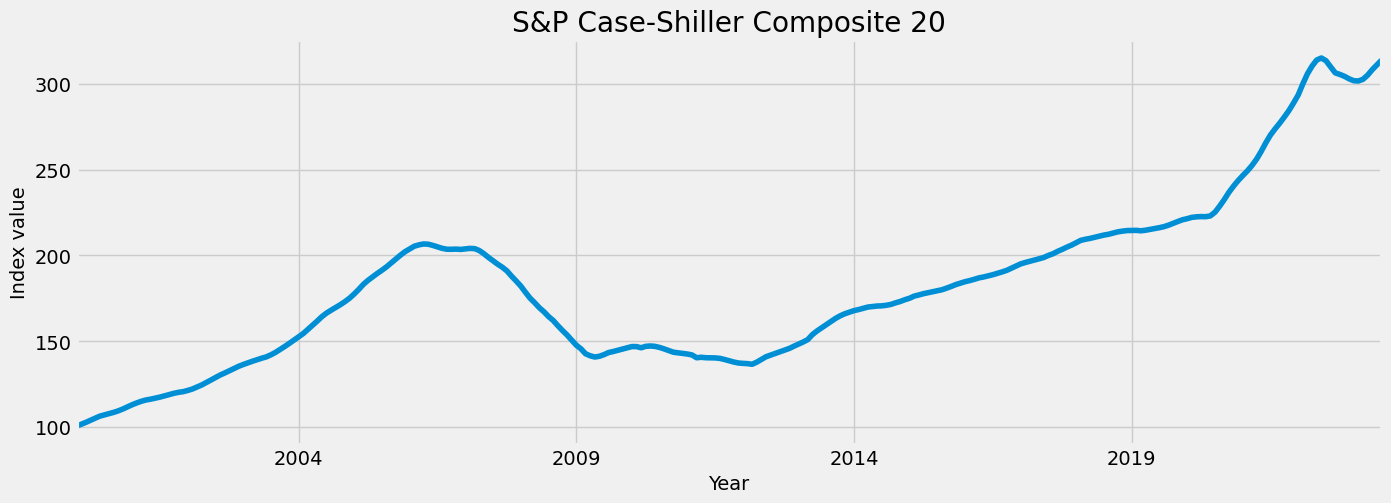

In [4]:
# Plotting a line graph of the composite index with Matplotlib
Case_Shiller_20=fred.get_series(series_id='SPCS20RSA').plot(figsize=(15,5), xlabel='Year', 
                                ylabel='Index value', title="S&P Case-Shiller Composite 20")
plt.show()

In [5]:
# Searching for seasonally adjusted series of the S&P/Case-Shiller
state_search = fred.search('Case-Shiller state home price index', filter=('seasonal_adjustment','Seasonally%20Adjusted'))
state_search = state_search.loc[state_search['title'].str.contains('S&P/Case-Shiller')]
state_search.index

Index(['CSUSHPISA', 'SFXRSA', 'SPCS20RSA', 'LXXRSA', 'SEXRSA', 'NYXRSA',
       'CHXRSA', 'SDXRSA', 'PHXRSA', 'DAXRSA', 'MIXRSA', 'BOXRSA', 'DNXRSA',
       'WDXRSA', 'ATXRSA', 'LVXRSA', 'SPCS10RSA', 'TPXRSA', 'MNXRSA', 'POXRSA',
       'DEXRSA', 'CRXRSA', 'CEXRSA', 'USCSCOMHPISA'],
      dtype='object', name='series id')

In [6]:
# Looping through all the series contained in state_search, getting and appending them into a list
results= []

for serie in state_search.index:
    result = fred.get_series(serie)
    result = result.to_frame(name=serie)
    results.append(result)

In [7]:
# Concatenating all series in a dataframe as columns
Case_Shiller_by_state = pd.concat(results, axis=1)
Case_Shiller_by_state

,CSUSHPISA,SFXRSA,SPCS20RSA,LXXRSA,SEXRSA,NYXRSA,CHXRSA,SDXRSA,PHXRSA,DAXRSA,MIXRSA,BOXRSA,DNXRSA,WDXRSA,ATXRSA,LVXRSA,SPCS10RSA,TPXRSA,MNXRSA,POXRSA,DEXRSA,CRXRSA,CEXRSA,USCSCOMHPISA
1975-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,298.396,335.819831,302.510686,396.912499,348.586448,274.905141,187.033040,390.629460,311.192894,285.606670,402.097208,303.426513,307.565683,301.054745,230.378547,270.121156,315.504197,369.160920,230.051018,317.490709,170.401292,255.962314,171.983888,NaN
2023-04-01,300.208,338.748233,304.945178,400.858851,350.966904,277.693829,188.731883,395.391482,310.965337,286.760964,403.225669,307.905362,308.976463,302.755048,232.212024,270.175070,318.312743,370.369118,231.265167,319.889576,172.061785,257.676896,174.927174,NaN
2023-05-01,302.685,341.684019,308.133764,404.789389,355.607748,281.734453,191.323882,400.915598,311.310442,289.060376,406.501669,310.513322,310.374382,306.150949,233.216867,270.758590,321.856804,372.719217,232.836096,320.899717,174.640604,259.118400,177.927290,NaN
2023-06-01,304.741,344.491821,310.938141,408.072681,360.307763,285.160889,192.727485,406.152871,313.170502,290.110085,410.035812,313.784715,311.504581,308.012719,235.157696,271.910162,324.830300,374.298127,234.034306,322.239904,175.246719,260.985877,179.555689,NaN


In [8]:
# Dropping composite series from the dataframe
Case_Shiller_by_state = Case_Shiller_by_state.drop(['CSUSHPISA','SPCS20RSA','SPCS10RSA','USCSCOMHPISA'],axis=1).dropna()
print(Case_Shiller_by_state)

                SFXRSA      LXXRSA      SEXRSA      NYXRSA      CHXRSA  \
2000-01-01  101.449954  101.031209  101.077268  100.339230  100.564840   
2000-02-01  104.170604  102.043406  101.657995  101.240657  101.411386   
2000-03-01  107.337223  103.224699  102.944145  102.060631  102.427760   
2000-04-01  110.632994  104.159399  103.482366  103.132504  103.411192   
2000-05-01  113.800513  104.924698  104.217188  104.915869  104.391108   
...                ...         ...         ...         ...         ...   
2023-03-01  335.819831  396.912499  348.586448  274.905141  187.033040   
2023-04-01  338.748233  400.858851  350.966904  277.693829  188.731883   
2023-05-01  341.684019  404.789389  355.607748  281.734453  191.323882   
2023-06-01  344.491821  408.072681  360.307763  285.160889  192.727485   
2023-07-01  345.622119  412.395360  366.427304  287.383038  194.423972   

                SDXRSA      PHXRSA      DAXRSA      MIXRSA      BOXRSA  \
2000-01-01  101.104565  100.412855  1

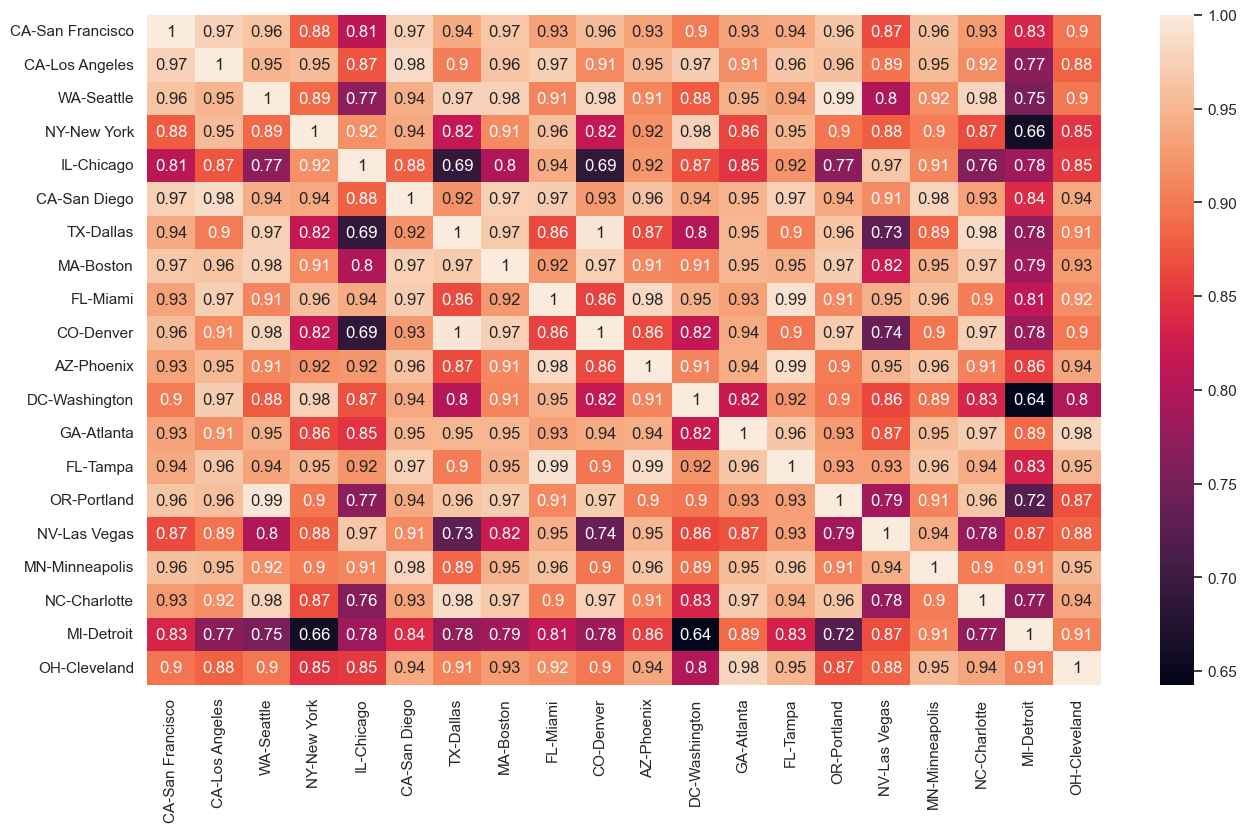

In [17]:
# Creating a heatmap showing correlation between house price indexes for every city
Case_Shiller_by_state.columns
Case_Shiller_by_state_corr=Case_Shiller_by_state[['CA-San Francisco', 'CA-Los Angeles', 'WA-Seattle', 'NY-New York',
                                                'IL-Chicago', 'CA-San Diego', 'TX-Dallas', 'MA-Boston', 'FL-Miami',
                                                'CO-Denver', 'AZ-Phoenix', 'DC-Washington', 'GA-Atlanta', 'FL-Tampa',
                                                'OR-Portland', 'NV-Las Vegas', 'MN-Minneapolis', 'NC-Charlotte',
                                                'MI-Detroit', 'OH-Cleveland']].corr()
sns.heatmap(data=Case_Shiller_by_state_corr, annot=True)
sns.set(rc={'figure.figsize':(14.7,8.27)})

In [18]:
# Showing highest, lowest and average correlation for every state included in the index
Case_Shiller_by_state_corr_stats = Case_Shiller_by_state_corr.agg(['min','max','mean']).T.rename\
(columns={'min':'Lowest_Correlation','max':'Highest_Correlation','mean':'Average_Correlation'})
Case_Shiller_by_state_corr_stats

,Lowest_Correlation,Highest_Correlation,Average_Correlation
CA-San Francisco,0.809020,1.0,0.927414
CA-Los Angeles,0.767799,1.0,0.933103
WA-Seattle,0.753176,1.0,0.917751
NY-New York,0.659694,1.0,0.891715
IL-Chicago,0.689253,1.0,0.848924
CA-San Diego,0.838204,1.0,0.943826
TX-Dallas,0.690972,1.0,0.892144
MA-Boston,0.785493,1.0,0.929604
FL-Miami,0.812693,1.0,0.931691
CO-Denver,0.689253,1.0,0.894122


In [19]:
# Creating an interactive graph showing house price index with all the 20 states included in the composite index
fig = px.line(Case_Shiller_by_state, title='Case-Shiller state home price index by state').update_layout(xaxis_title='Year', 
                                                                                                   yaxis_title='Value')
fig.show()

In [14]:
# Modifying title column's names and creating a dictionary with indexes and corresponding titles
id_to_title = state_search['title'].str.replace('S&P/Case-Shiller ','').str.replace(' Home Price Index','').to_dict()
id_to_title

{'CSUSHPISA': 'U.S. National',
 'SFXRSA': 'CA-San Francisco',
 'SPCS20RSA': '20-City Composite',
 'LXXRSA': 'CA-Los Angeles',
 'SEXRSA': 'WA-Seattle',
 'NYXRSA': 'NY-New York',
 'CHXRSA': 'IL-Chicago',
 'SDXRSA': 'CA-San Diego',
 'PHXRSA': 'AZ-Phoenix',
 'DAXRSA': 'TX-Dallas',
 'MIXRSA': 'FL-Miami',
 'BOXRSA': 'MA-Boston',
 'DNXRSA': 'CO-Denver',
 'WDXRSA': 'DC-Washington',
 'ATXRSA': 'GA-Atlanta',
 'LVXRSA': 'NV-Las Vegas',
 'SPCS10RSA': '10-City Composite',
 'TPXRSA': 'FL-Tampa',
 'MNXRSA': 'MN-Minneapolis',
 'POXRSA': 'OR-Portland',
 'DEXRSA': 'MI-Detroit',
 'CRXRSA': 'NC-Charlotte',
 'CEXRSA': 'OH-Cleveland',
 'USCSCOMHPISA': 'U.S. National (DISCONTINUED)'}

In [15]:
# Replacing the ids with the titles in the Case_Shiller_by_state dataframe
Case_Shiller_by_state.columns = [id_to_title[c] for c in Case_Shiller_by_state.columns]

In [21]:
# Creating a new dataframe showing yearly percentual changes for values contained in Case_Shiller_by_state
Case_Shiller_by_state_yearly = pd.DataFrame() 

for column in Case_Shiller_by_state.columns:
    Case_Shiller_by_state_yearly[column+'_yearly_change'] = Case_Shiller_by_state[column].pct_change(12)*100 

In [22]:
# Dropping null values and rounding to two decimals
Case_Shiller_by_state_yearly = Case_Shiller_by_state_yearly.dropna().round(2)

In [23]:
# Plotting interactive line graph showing percent changes for every state
fig = px.line(Case_Shiller_by_state_yearly, title='Case-Shiller Yearly Percentage Change by State').update_layout\
       (xaxis_title='Year', yaxis_title='Yearly Percentage Change')
fig.show()

In [24]:
# Subsetting Case_Shiller_by_state_yearly into a new dataframe related to the great financial crisis and sorting it
# from the lowest to the highest percentage change
Case_Shiller_by_state_great_financial_crisis = Case_Shiller_by_state_yearly.loc['2007-12-01':'2009-07-01'].min()\
                                               .sort_values(ascending=True)
# Modifying the new dataframe index
Case_Shiller_by_state_great_financial_crisis.index = Case_Shiller_by_state_great_financial_crisis.index.str.replace\
                                                   ('_yearly_change','')
Case_Shiller_by_state_great_financial_crisis
# Plotting a bar graph with Plotly
px.bar(Case_Shiller_by_state_great_financial_crisis).update_layout(xaxis_title='City', \
                                                                   yaxis_title='Lowest Yearly Percentage Change')  

In [25]:
# Creating a new dataframe showing monthly percentual changes for values contained in Case_Shiller_by_state
Case_Shiller_by_state_monthly = pd.DataFrame() 

for column in Case_Shiller_by_state.columns:
    Case_Shiller_by_state_monthly[column+'_monthly_change'] = Case_Shiller_by_state[column].pct_change(1)*100 

In [26]:
# Dropping null values and rounding to two decimals
Case_Shiller_by_state_monthly = Case_Shiller_by_state_monthly.dropna().round(2)
Case_Shiller_by_state_monthly

,CA-San Francisco_monthly_change,CA-Los Angeles_monthly_change,WA-Seattle_monthly_change,NY-New York_monthly_change,IL-Chicago_monthly_change,CA-San Diego_monthly_change,AZ-Phoenix_monthly_change,TX-Dallas_monthly_change,FL-Miami_monthly_change,MA-Boston_monthly_change,CO-Denver_monthly_change,DC-Washington_monthly_change,GA-Atlanta_monthly_change,NV-Las Vegas_monthly_change,FL-Tampa_monthly_change,MN-Minneapolis_monthly_change,OR-Portland_monthly_change,MI-Detroit_monthly_change,NC-Charlotte_monthly_change,OH-Cleveland_monthly_change
2000-02-01,2.68,1.00,0.57,0.90,0.84,1.29,0.52,2.31,0.53,0.97,0.98,0.82,0.91,0.50,0.71,0.78,0.65,0.73,0.44,-0.02
2000-03-01,3.04,1.16,1.27,0.81,1.00,1.64,0.77,-0.32,0.61,0.74,1.07,1.17,0.38,0.53,0.65,0.65,0.30,0.49,0.03,0.65
2000-04-01,3.07,0.91,0.52,1.05,0.96,1.55,0.55,0.55,0.91,1.65,0.79,1.03,1.01,0.16,0.85,1.32,0.61,0.38,1.12,0.57
2000-05-01,2.86,0.73,0.71,1.73,0.95,1.35,0.70,0.42,0.73,1.59,1.70,0.93,0.55,0.44,1.06,1.39,-0.10,0.80,-0.03,0.41
2000-06-01,2.65,0.73,0.21,1.10,1.07,1.71,0.69,-0.10,0.64,1.81,1.52,0.76,0.84,0.23,0.81,1.15,0.11,0.68,0.44,-0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,0.42,0.43,-0.66,0.78,0.88,0.80,-0.48,-0.19,0.20,-0.03,0.06,0.40,0.36,-0.48,0.23,0.81,0.14,1.43,0.78,-0.24
2023-04-01,0.87,0.99,0.68,1.01,0.91,1.22,-0.07,0.40,0.28,1.48,0.46,0.56,0.80,0.02,0.33,0.53,0.76,0.97,0.67,1.71
2023-05-01,0.87,0.98,1.32,1.46,1.37,1.40,0.11,0.80,0.81,0.85,0.45,1.12,0.43,0.22,0.63,0.68,0.32,1.50,0.56,1.72
2023-06-01,0.82,0.81,1.32,1.22,0.73,1.31,0.60,0.36,0.87,1.05,0.36,0.61,0.83,0.43,0.42,0.51,0.42,0.35,0.72,0.92


In [31]:
# Plotting an interactive bar chart showing monthly percent changes for all 20 cities included in the Case-Shiller index
fig = px.bar(Case_Shiller_by_state_monthly).update_layout(width=1600, height=800)
fig.show()

In [32]:
# Showing maximum, minimum and average monthly percent change through for all the series
Case_Shiller_by_state_monthly_statistics = Case_Shiller_by_state_monthly.agg(['min','max','mean']).T.rename\
(columns={'min':'Lowest_monthly_increase','max':'Highest_monthly_increase','mean':'Average_monthly_increase'})
# Modifying the indexes
Case_Shiller_by_state_monthly_statistics.index = Case_Shiller_by_state_great_financial_crisis.index.str.replace\
                                                   ('_monthly_change','')
Case_Shiller_by_state_monthly_statistics

,Lowest_monthly_increase,Highest_monthly_increase,Average_monthly_increase
AZ-Phoenix,-4.17,3.20,0.444681
NV-Las Vegas,-3.69,3.21,0.506525
CA-San Francisco,-2.73,3.12,0.461986
FL-Miami,-1.76,2.06,0.376099
CA-Los Angeles,-3.31,2.75,0.236809
CA-San Diego,-3.38,3.32,0.506489
MI-Detroit,-4.50,4.32,0.418369
FL-Tampa,-1.55,3.07,0.380567
MN-Minneapolis,-4.14,3.13,0.512730
DC-Washington,-1.65,2.22,0.406738
